<a href="https://colab.research.google.com/github/Spoorthikb11/Road-Accident-Analysis-in-India/blob/main/practice_python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#62. Hangman Game:
import random
words = ['python', 'hangman', 'challenge', 'programming', 'cloud', 'technology']

# Choose a random word
word = random.choice(words)
guessed_letters = set()
attempts = 6  # You can change the number of allowed incorrect guesses
display = ['_' for _ in word]

print("Welcome to Hangman!")
print("Guess the word:")

while attempts > 0 and '_' in display:
    print("\nWord:", ' '.join(display))
    print(f"Guessed letters: {', '.join(sorted(guessed_letters))}")
    print(f"Remaining attempts: {attempts}")

    guess = input("Enter a letter: ").lower()

    if not guess.isalpha() or len(guess) != 1:
        print("Please enter a single alphabetical character.")
        continue

    if guess in guessed_letters:
        print("You already guessed that letter.")
        continue

    guessed_letters.add(guess)

    if guess in word:
        for i in range(len(word)):
            if word[i] == guess:
                display[i] = guess
        print("Correct guess!")
    else:
        attempts -= 1
        print("Wrong guess.")

if '_' not in display:
    print("\nCongratulations! You guessed the word:", word)
else:
    print("\nGame over. The word was:", word)



Welcome to Hangman!
Guess the word:

Word: _ _ _ _ _
Guessed letters: 
Remaining attempts: 6
Enter a letter: o
Correct guess!

Word: _ _ o _ _
Guessed letters: o
Remaining attempts: 6
Enter a letter: c
Correct guess!

Word: c _ o _ _
Guessed letters: c, o
Remaining attempts: 6
Enter a letter: l
Correct guess!

Word: c l o _ _
Guessed letters: c, l, o
Remaining attempts: 6
Enter a letter: u
Correct guess!

Word: c l o u _
Guessed letters: c, l, o, u
Remaining attempts: 6
Enter a letter: d
Correct guess!

Congratulations! You guessed the word: cloud


In [5]:
#63.Caesar Cipher: Encode and Decode Strings
def caesar_cipher(text, shift, mode='encode'):
    result = ''
    if mode == 'decode':
        shift = -shift

    for char in text:
        if char.isalpha():
            base = ord('A') if char.isupper() else ord('a')
            shifted = (ord(char) - base + shift) % 26 + base
            result += chr(shifted)
        else:
            result += char  # Keep punctuation/space unchanged
    return result

# Example
original = "Hello World"
encoded = caesar_cipher(original, 3, mode='encode')
decoded = caesar_cipher(encoded, 3, mode='decode')

print("Original:", original)
print("Encoded :", encoded)
print("Decoded :", decoded)


Original: Hello World
Encoded : Khoor Zruog
Decoded : Hello World


In [6]:
#64. Shannon's Throbac: Roman Numeral Arithmetic Simulator
roman_to_int = {
    'I': 1, 'V': 5, 'X': 10, 'L': 50,
    'C': 100, 'D': 500, 'M': 1000
}

def from_roman(s):
    total = 0
    prev = 0
    for ch in reversed(s):
        value = roman_to_int[ch]
        if value < prev:
            total -= value
        else:
            total += value
        prev = value
    return total

def to_roman(num):
    int_to_roman = [
        (1000, 'M'), (900, 'CM'), (500, 'D'), (400, 'CD'),
        (100, 'C'), (90, 'XC'), (50, 'L'), (40, 'XL'),
        (10, 'X'), (9, 'IX'), (5, 'V'), (4, 'IV'), (1, 'I')
    ]
    result = ''
    for value, symbol in int_to_roman:
        while num >= value:
            result += symbol
            num -= value
    return result
r1 = "XII"
r2 = "VIII"
sum_result = from_roman(r1) + from_roman(r2)
print(f"{r1} + {r2} = {to_roman(sum_result)}")


XII + VIII = XX


In [9]:
#65. Rock Paper Scissors Game
import random

choices = ['rock', 'paper', 'scissors']

def determine_winner(user, computer):
    if user == computer:
        return "It's a tie!"
    elif (user == 'rock' and computer == 'scissors') or \
         (user == 'paper' and computer == 'rock') or \
         (user == 'scissors' and computer == 'paper'):
        return "You win!"
    else:
        return "Computer wins!"

# Game
user_choice = input("Choose rock, paper, or scissors: ").lower()
if user_choice not in choices:
    print("Invalid input.")
else:
    computer_choice = random.choice(choices)
    print("Computer chose:", computer_choice)
    print(determine_winner(user_choice, computer_choice))




Choose rock, paper, or scissors: scissors
Computer chose: paper
You win!


In [25]:
#66. Scrambled Words
import random

# Function to scramble a word
def scramble_word(word):
    if len(word) <= 3:
        return word
    middle = list(word[1:-1])
    random.shuffle(middle)
    return word[0] + ''.join(middle) + word[-1]

# Function to scramble a sentence
def scramble_text(text):
    words = text.split()
    scrambled = []
    for word in words:
        stripped = word.strip('.,!?')
        scrambled_word = scramble_word(stripped)
        if word[-1] in '.,!?':
            scrambled_word += word[-1]
        scrambled.append(scrambled_word)
    return ' '.join(scrambled)

# Sample text
sample_text = "English university research shows that scrambled words can still be read."

# Output the scrambled text
print("Original :", sample_text)
print("Scrambled:", scramble_text(sample_text))


Original : English university research shows that scrambled words can still be read.
Scrambled: Eilsgnh uviisernty rsraceeh shows taht sbcrmaeld wrods can slitl be raed.


In [26]:
#67. Cracking a Caesar Cipher using Letter Frequency
from collections import Counter

# Function to decode Caesar cipher
def decode_caesar(cipher_text, shift):
    result = ''
    for char in cipher_text:
        if char.isalpha():
            base = ord('A') if char.isupper() else ord('a')
            result += chr((ord(char) - base - shift) % 26 + base)
        else:
            result += char
    return result

# Function to crack the Caesar cipher
def crack_caesar(cipher_text):
    freq = Counter(c for c in cipher_text.lower() if c.isalpha())
    most_common = freq.most_common(1)[0][0]
    likely_shift = (ord(most_common) - ord('e')) % 26
    print(f"Guessed shift: {likely_shift}")
    return decode_caesar(cipher_text, likely_shift)

# Sample cipher text
cipher = "Wklv lv d vhfuhw phvvdjh."

# Output the decrypted text
print("Decrypted:", crack_caesar(cipher))


Guessed shift: 17
Decrypted: Ftue ue m eqodqf yqeemsq.


In [27]:
#68.Facebook: Suggest Facebook Friends
import networkx as nx

# Sample anonymized data: friends (edges between users)
friends_data = [
    ('User1', 'User2'),
    ('User2', 'User3'),
    ('User3', 'User4'),
    ('User1', 'User4'),
    ('User2', 'User5'),
]
G = nx.Graph()
G.add_edges_from(friends_data)
)
user = 'User2'
friends_of_user = list(G.neighbors(user))
print(f"Friends of {user}: {friends_of_user}")

suggestions = []
for friend in friends_of_user:
    for potential_friend in list(G.neighbors(friend)):
        if potential_friend != user and potential_friend not in friends_of_user:
            suggestions.append(potential_friend)

print(f"Friend suggestions for {user}: {suggestions}")


Friends of User2: ['User1', 'User3', 'User5']
Friend suggestions for User2: ['User4', 'User4']


In [28]:
#69.Baseball: List Players with Top Batting Averages
import pandas as pd

# Sample data for illustration
data = {
    'Player': ['Player1', 'Player2', 'Player3', 'Player4', 'Player5'],
    'Batting_Average': [0.324, 0.342, 0.310, 0.280, 0.350]
}

df = pd.DataFrame(data)

top_players = df.sort_values(by='Batting_Average', ascending=False).head(8)
print(top_players[['Player', 'Batting_Average']])


    Player  Batting_Average
4  Player5            0.350
1  Player2            0.342
0  Player1            0.324
2  Player3            0.310
3  Player4            0.280


In [29]:
#70.Scrambled English: Scramble Words
import random

def scramble_word(word):
    if len(word) <= 3:
        return word
    middle = list(word[1:-1])
    random.shuffle(middle)
    return word[0] + ''.join(middle) + word[-1]

def scramble_text(text):
    words = text.split()
    return ' '.join([scramble_word(word) for word in words])
sentence = "The quick brown fox jumps over the lazy dog."
print("Original:", sentence)
print("Scrambled:", scramble_text(sentence))


Original: The quick brown fox jumps over the lazy dog.
Scrambled: The qucik bworn fox jumps oevr the lzay dog.


In [30]:
#71.Basketball: Best NBA Player
import requests
from bs4 import BeautifulSoup

url = "https://www.basketball-reference.com/leagues/NBA_2021_per_game.html"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
# Extract player names and stats from the table (for simplicity, just the first few players)
players = []
for row in soup.find_all('tr')[1:6]:
    cols = row.find_all('td')
    player = cols[1].text  # Player name
    ppg = float(cols[26].text)  # Points per game
    players.append((player, ppg))

# Sort players by points per game
players = sorted(players, key=lambda x: x[1], reverse=True)
print("Best NBA Players based on points per game:", players)


Best NBA Players based on points per game: [('32', 3.4), ('26', 3.4), ('27', 3.1), ('26', 3.1), ('30', 3.0)]


In [32]:
#72.Latin: Search for Latin Roots, Suffixes, and Prefixes
import re

# Sample Latin word file
latin_text = """
ab- away from (e.g., abnormal)
ad- to, toward (e.g., adjust)
-ology study of (e.g., biology)
-phobia fear of (e.g., arachnophobia)
"""

# Search for roots, prefixes, and suffixes in the text
pattern = r"(\w+-?[\w]+)"
matches = re.findall(pattern, latin_text)

print("Found Latin roots, suffixes, and prefixes:", matches)


Found Latin roots, suffixes, and prefixes: ['ab', 'away', 'from', 'abnormal', 'ad', 'to', 'toward', 'adjust', 'ology', 'study', 'of', 'biology', 'phobia', 'fear', 'of', 'arachnophobia']


In [33]:
#73.Anagrams: Find All Anagrams
from collections import defaultdict

# Sample word list
word_list = ["listen", "silent", "enlist", "rat", "tar", "art"]

# Function to find anagrams
def find_anagrams(words):
    anagrams = defaultdict(list)
    for word in words:
        sorted_word = ''.join(sorted(word))
        anagrams[sorted_word].append(word)
    return [group for group in anagrams.values() if len(group) > 1]

# Finding anagrams in the word list
anagram_groups = find_anagrams(word_list)
print("Anagram groups:", anagram_groups)


Anagram groups: [['listen', 'silent', 'enlist'], ['rat', 'tar', 'art']]


In [34]:
#74.Data Mining: Google Stock Data
import yfinance as yf

# Fetch Google stock data (symbol: GOOGL)
google_stock = yf.download('GOOGL', start='2020-01-01', end='2021-01-01')

# Display the stock data
print(google_stock.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                            
2020-01-02  68.108368  68.108368  67.004150  67.099694  27278000
2020-01-03  67.752083  68.360677  67.045462  67.079304  23408000
2020-01-06  69.557945  69.583321  67.228582  67.259926  46768000
2020-01-07  69.423592  69.841098  69.246938  69.689821  34330000
2020-01-08  69.917725  70.256604  69.300178  69.409154  35314000


In [38]:
#75.Query to Search Files Ignoring Stop Words
import re

def create_sample_file():
    with open("sample.txt", "w") as f:
        f.write("""This is a sample text file.
        It contains data for testing the search function.
        Python is powerful and fun.
        Searching files in Python is easy.
        Machine learning is part of data science.
        The quick brown fox jumps over the lazy dog.""")

def search_files(query, file_name):
    # Define a list of stop words
    stop_words = set(["a", "an", "the", "in", "on", "and", "of", "to", "is", "are"])

    # Remove stop words from the query
    query_words = [word.lower() for word in query.split() if word.lower() not in stop_words]

    # Read file and search
    with open(file_name, 'r') as file:
        content = file.read()
        matches = [
            line.strip() for line in content.splitlines()
            if any(word in line.lower() for word in query_words)
        ]

    return matches

# Create a sample file to test
create_sample_file()
results = search_files("search data in file", "sample.txt")
print("Matching lines:")
for line in results:
    print("-", line)


Matching lines:
- This is a sample text file.
- It contains data for testing the search function.
- Searching files in Python is easy.
- Machine learning is part of data science.


In [39]:
#76.Calculate Return on Equity (ROE)
def calculate_roe(net_income, equity):
    return (net_income / equity) * 100

# Sample data
net_income = 50000
equity = 250000

roe = calculate_roe(net_income, equity)
print(f"Return on Equity (ROE): {roe}%")


Return on Equity (ROE): 20.0%


In [40]:
#77.Pascal's Triangle
def generate_pascals_triangle(depth):
    triangle = [[1]]
    for i in range(1, depth):
        row = [1]
        for j in range(1, i):
            row.append(triangle[i-1][j-1] + triangle[i-1][j])
        row.append(1)
        triangle.append(row)
    return triangle
triangle = generate_pascals_triangle(5)
for row in triangle:
    print(row)


[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


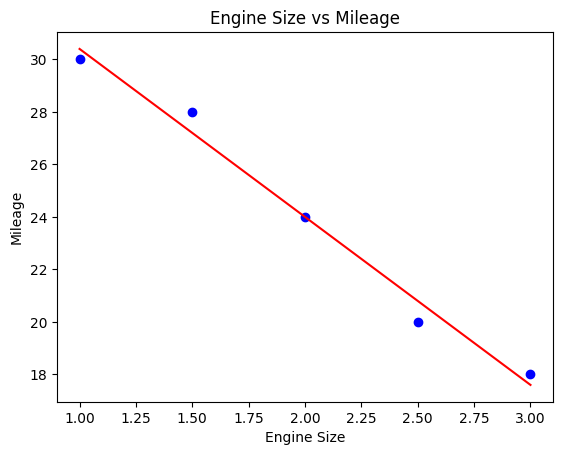

In [41]:
#78. Auto Mileage and Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
engine_size = np.array([1.0, 1.5, 2.0, 2.5, 3.0]).reshape(-1, 1)
mileage = np.array([30, 28, 24, 20, 18])
model = LinearRegression()
model.fit(engine_size, mileage)
predicted_mileage = model.predict(engine_size)

plt.scatter(engine_size, mileage, color='blue')
plt.plot(engine_size, predicted_mileage, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Mileage')
plt.title('Engine Size vs Mileage')
plt.show()


In [42]:
#79. Packaging: Minimize Cardboard Use
def calculate_box_area(dimensions):
    length, width, height = dimensions
    return 2 * (length * width + length * height + width * height)

# Example dimensions for each glass (length, width, height)
glass_dimensions = [(5, 5, 10), (6, 6, 12), (7, 7, 14)]

# Calculate the total cardboard area required
total_area = sum(calculate_box_area(dim) for dim in glass_dimensions)
print(f"Total cardboard area: {total_area} square units")


Total cardboard area: 1100 square units


In [43]:
#80.GDP and Income: Who are the 1%?
import pandas as pd
data = {
    'Country': ['USA', 'India', 'Germany', 'Brazil', 'Canada'],
    'GDP_per_capita': [65000, 2100, 48000, 9000, 52000],
    'Income': [72000, 2200, 49000, 9500, 53000]
}

df = pd.DataFrame(data)
df['Top1%'] = df['Income'] >= df['Income'].quantile(0.99)
print("GDP and Income Data:\n", df)


GDP and Income Data:
    Country  GDP_per_capita  Income  Top1%
0      USA           65000   72000   True
1    India            2100    2200  False
2  Germany           48000   49000  False
3   Brazil            9000    9500  False
4   Canada           52000   53000  False


In [44]:
#81.Co-Occurrence: Build Dictionaries of Sets
words = ["apple banana", "banana cherry", "apple cherry", "apple banana cherry"]
co_occurrence = {}

for sentence in words:
    tokens = sentence.split()
    for word in tokens:
        if word not in co_occurrence:
            co_occurrence[word] = set()
        co_occurrence[word].update(w for w in tokens if w != word)

print("Co-Occurrence Dictionary:")
for word, co_words in co_occurrence.items():
    print(f"{word}: {co_words}")



Co-Occurrence Dictionary:
apple: {'banana', 'cherry'}
banana: {'cherry', 'apple'}
cherry: {'banana', 'apple'}


In [45]:
#82.Document Retrieval System
documents = [
    "Python is a programming language",
    "Machine learning is part of AI",
    "Natural Language Processing deals with text"
]

def search_documents(query):
    return [doc for doc in documents if query.lower() in doc.lower()]

# Example
print("Search results for 'python':", search_documents("python"))


Search results for 'python': ['Python is a programming language']


In [46]:
#83.Wikipedia Log Parser
logs = [
    "UserA edited Article1",
    "UserB edited Article2",
    "UserA edited Article3",
    "UserB edited Article2",
    "UserA edited Article1"
]

from collections import defaultdict
edit_count = defaultdict(int)
for log in logs:
    user = log.split()[0]
    edit_count[user] += 1
print("User who edited most articles:", max(edit_count, key=edit_count.get))


User who edited most articles: UserA


In [47]:
#84.TagCloud2
text = "America economy jobs America tax healthcare economy policy debate"
words = text.lower().split()
freq = {}
for word in words:
    freq[word] = freq.get(word, 0) + 1
print("Word Frequencies (Tag Cloud):")
for word, count in freq.items():
    print(f"{word}: {count}")


Word Frequencies (Tag Cloud):
america: 2
economy: 2
jobs: 1
tax: 1
healthcare: 1
policy: 1
debate: 1


In [48]:
#85.Word Completion
dictionary = ['apple', 'application', 'apply', 'banana', 'band', 'cat']
def complete_word(prefix):
    return [word for word in dictionary if word.startswith(prefix)]
print("Word completions for 'app':", complete_word("app"))


Word completions for 'app': ['apple', 'application', 'apply']


In [49]:
#86. TagCloud: VP Debate
debate_text = """
We need a strong economy and good policies. Policies matter for families, small businesses, and national growth.
"""
from collections import Counter
words = debate_text.lower().split()
word_counts = Counter(words)
print("Tag Cloud Word Frequencies:")
for word, count in word_counts.items():
    print(f"{word}: {count}")


Tag Cloud Word Frequencies:
we: 1
need: 1
a: 1
strong: 1
economy: 1
and: 2
good: 1
policies.: 1
policies: 1
matter: 1
for: 1
families,: 1
small: 1
businesses,: 1
national: 1
growth.: 1


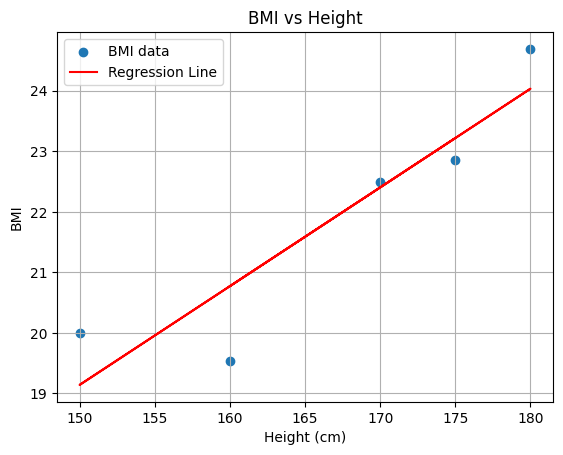

Correlation: 0.9187971433957833


In [50]:
#87. BMI Analysis with Regression and Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data
data = {
    'Height_cm': [160, 170, 180, 150, 175],
    'Weight_kg': [50, 65, 80, 45, 70]
}
df = pd.DataFrame(data)
df['Height_m'] = df['Height_cm'] / 100
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)

# Linear Regression
slope, intercept, r_value, _, _ = linregress(df['Height_cm'], df['BMI'])

# Plot
plt.scatter(df['Height_cm'], df['BMI'], label='BMI data')
plt.plot(df['Height_cm'], slope * df['Height_cm'] + intercept, color='red', label='Regression Line')
plt.xlabel("Height (cm)")
plt.ylabel("BMI")
plt.title("BMI vs Height")
plt.legend()
plt.grid(True)
plt.show()

print("Correlation:", r_value)



In [51]:
#88. SpellCheck with Suggestions
import difflib

dictionary = ["apple", "banana", "orange", "grape", "pineapple"]

def spell_check(word):
    if word in dictionary:
        return f"'{word}' is spelled correctly."
    else:
        suggestions = difflib.get_close_matches(word, dictionary)
        return f"'{word}' is incorrect. Suggestions: {suggestions}"

# Example
print(spell_check("appl"))


'appl' is incorrect. Suggestions: ['apple', 'pineapple']


In [52]:
#89. Natural Language Processing I: Unigrams and Bigrams
text = "the quick brown fox jumps over the lazy dog"
words = text.lower().split()
unigrams = words
bigrams = list(zip(words, words[1:]))

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)




Unigrams: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Bigrams: [('the', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog')]


In [53]:
#90.Natural Language Processing II: Markov Chains
import random

text = "I love coding and coding is fun and fun is good"
words = text.split()

# Build Markov Chain
markov_chain = {}
for i in range(len(words) - 1):
    word, next_word = words[i], words[i+1]
    if word not in markov_chain:
        markov_chain[word] = []
    markov_chain[word].append(next_word)

# Generate text
word = "coding"
generated = [word]
for _ in range(10):
    next_words = markov_chain.get(word)
    if not next_words:
        break
    word = random.choice(next_words)
    generated.append(word)

print("Generated text:", ' '.join(generated))






Generated text: coding and coding and fun is good


In [54]:
#91.Vocabulary Quiz
quiz = {
    "benevolent": "well meaning and kindly",
    "candid": "truthful and straightforward",
    "diligent": "showing care in work"
}
for word, definition in quiz.items():
    answer = input(f"What does '{word}' mean? ")
    print("Correct!" if answer.lower() in definition.lower() else f"Wrong. Answer: {definition}")


What does 'benevolent' mean?  well meaning and kindly
Wrong. Answer: well meaning and kindly
What does 'candid' mean? truthful and straightforward
Correct!
What does 'diligent' mean? showing care in work
Correct!


In [55]:
#92. Concordance Builder
text = "the cat and the dog ran and the dog barked"
words = text.split()
concordance = {}
for index, word in enumerate(words):
    if word not in concordance:
        concordance[word] = []
    concordance[word].append(index)
print("Concordance:")
for word, indices in concordance.items():
    print(f"{word}: {indices}")


Concordance:
the: [0, 3, 7]
cat: [1]
and: [2, 6]
dog: [4, 8]
ran: [5]
barked: [9]


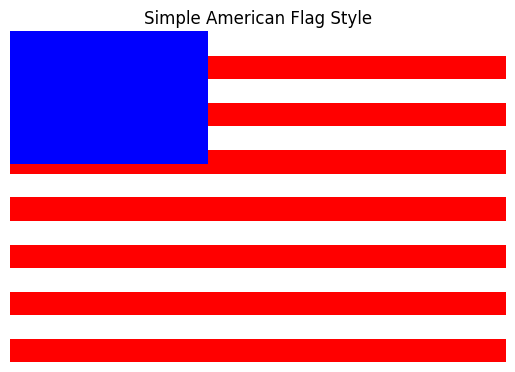

In [56]:
#93.Flags
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class SimpleFlag:
    def draw(self):
        fig, ax = plt.subplots()
        # Background rectangle (white)
        ax.add_patch(patches.Rectangle((0, 0), 6, 4, facecolor='white'))
        for i in range(7):
            ax.add_patch(patches.Rectangle((0, i * 0.57), 6, 0.28, facecolor='red'))
        ax.add_patch(patches.Rectangle((0, 2.4), 2.4, 1.6, facecolor='blue'))

        plt.xlim(0, 6)
        plt.ylim(0, 4)
        plt.axis('off')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title("Simple American Flag Style")
        plt.show()

flag = SimpleFlag()
flag.draw()


In [57]:
#94. Quadrilaterals
class Quadrilateral:
    def __init__(self, side1, side2, side3, side4):
        self.sides = [side1, side2, side3, side4]

    def perimeter(self):
        return sum(self.sides)

quad = Quadrilateral(4, 5, 4, 5)
print("Perimeter of quadrilateral:", quad.perimeter())


Perimeter of quadrilateral: 18


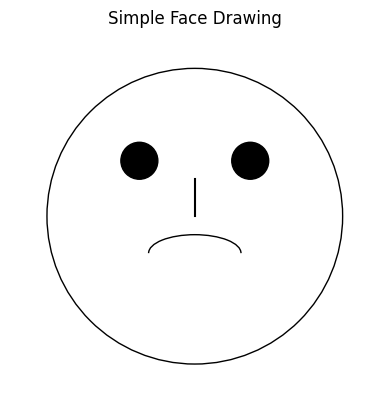

In [59]:
#95.Face Drawing Program
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # <- important!
class Eye:
    def draw(self, ax, x, y):
        eye = plt.Circle((x, y), 0.1, color='black')
        ax.add_patch(eye)
class Nose:
    def draw(self, ax, x, y):
        ax.plot([x, x], [y, y - 0.2], color='black')
class Mouth:
    def draw(self, ax, x, y):
        mouth = patches.Arc((x, y), 0.5, 0.2, theta1=0, theta2=180, color='black')
        ax.add_patch(mouth)
class Face:
    def draw(self):
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        head = plt.Circle((0, 0), 0.8, fill=False)
        ax.add_patch(head)
        Eye().draw(ax, -0.3, 0.3)
        Eye().draw(ax, 0.3, 0.3)
        Nose().draw(ax, 0, 0.2)
        Mouth().draw(ax, 0, -0.2)
        plt.axis('off')
        plt.title("Simple Face Drawing")
        plt.show()
face = Face()
face.draw()

In [60]:
#96.Minesweeper
import random
class Minesweeper:
    def __init__(self, size, num_mines):
        self.size = size
        self.board = [[' ']*size for _ in range(size)]
        self.mines = set()
        while len(self.mines) < num_mines:
            x, y = random.randint(0, size-1), random.randint(0, size-1)
            self.mines.add((x, y))

    def show_board(self):
        for row in self.board:
            print(" | ".join(row))
            print("-" * (4*self.size - 1))

    def reveal(self, x, y):
        if (x, y) in self.mines:
            self.board[x][y] = 'X'
            print("Boom! You hit a mine.")
        else:
            self.board[x][y] = 'O'
            print("Safe.")
game = Minesweeper(5, 3)
game.show_board()
game.reveal(1, 1)
game.show_board()

  |   |   |   |  
-------------------
  |   |   |   |  
-------------------
  |   |   |   |  
-------------------
  |   |   |   |  
-------------------
  |   |   |   |  
-------------------
Safe.
  |   |   |   |  
-------------------
  | O |   |   |  
-------------------
  |   |   |   |  
-------------------
  |   |   |   |  
-------------------
  |   |   |   |  
-------------------


In [61]:
#97.Protein Transcription Class
class ProteinTranscriber:
    codon_table = {
        'AUG': 'Methionine',
        'UUU': 'Phenylalanine', 'UUC': 'Phenylalanine',
        'UUA': 'Leucine', 'UUG': 'Leucine',
    }

    def transcribe(self, dna):
        rna = dna.replace('T', 'U')
        return [self.codon_table.get(rna[i:i+3], 'Unknown') for i in range(0, len(rna), 3)]

transcriber = ProteinTranscriber()
print("Amino acids:", transcriber.transcribe("ATGTTACTT"))


Amino acids: ['Methionine', 'Leucine', 'Unknown']


In [62]:
#98.ATM Queue Simulation
import queue
import random

class ATMEvent:
    def __init__(self, time, action):
        self.time = time
        self.action = action

    def __lt__(self, other):
        return self.time < other.time

def simulate_one_queue():
    event_queue = queue.PriorityQueue()
    time = 0
    for i in range(10):  # 10 students
        arrival = time + random.randint(1, 5)
        event_queue.put(ATMEvent(arrival, f"Student {i+1} arrives"))

    while not event_queue.empty():
        event = event_queue.get()
        print(f"Time {event.time}: {event.action}")

simulate_one_queue()


Time 2: Student 5 arrives
Time 2: Student 7 arrives
Time 3: Student 1 arrives
Time 3: Student 2 arrives
Time 4: Student 3 arrives
Time 4: Student 6 arrives
Time 4: Student 10 arrives
Time 4: Student 8 arrives
Time 5: Student 4 arrives
Time 5: Student 9 arrives


In [63]:
#99.Golf Relaxed
import random

def golf_relaxed():
    deck = list(range(1, 14)) * 4
    random.shuffle(deck)
    tableau = [deck.pop() for _ in range(7)]
    discard = deck.pop()

    print("Initial Tableau:", tableau)
    print("Starting Discard:", discard)

    while tableau:
        playable = [card for card in tableau if abs(card - discard) == 1]
        if not playable:
            break
        chosen = playable[0]
        tableau.remove(chosen)
        discard = chosen
        print("Played:", chosen, " | New Discard:", discard, " | Tableau:", tableau)

    print("Game Over. Cards Left in Tableau:", len(tableau))

golf_relaxed()


Initial Tableau: [8, 3, 10, 3, 6, 5, 2]
Starting Discard: 7
Played: 8  | New Discard: 8  | Tableau: [3, 10, 3, 6, 5, 2]
Game Over. Cards Left in Tableau: 6


In [64]:
#100.Aces Up
import random
def aces_up():
    deck = list(range(1, 14)) * 4
    random.shuffle(deck)
    piles = [[] for _ in range(4)]

    while deck:
        for pile in piles:
            if deck:
                pile.append(deck.pop())
        print("Piles:", piles)
        top_cards = [pile[-1] for pile in piles if pile]
        for i, card1 in enumerate(top_cards):
            for j, card2 in enumerate(top_cards):
                if i != j and card1 % 13 == card2 % 13 and card1 < card2:
                    if piles[i]: piles[i].pop()

    print("Final Piles:", piles)

aces_up()


Piles: [[4], [8], [10], [3]]
Piles: [[4, 13], [8, 1], [10, 4], [3, 9]]
Piles: [[4, 13, 8], [8, 1, 5], [10, 4, 5], [3, 9, 2]]
Piles: [[4, 13, 8, 11], [8, 1, 5, 7], [10, 4, 5, 10], [3, 9, 2, 4]]
Piles: [[4, 13, 8, 11, 11], [8, 1, 5, 7, 6], [10, 4, 5, 10, 13], [3, 9, 2, 4, 7]]
Piles: [[4, 13, 8, 11, 11, 2], [8, 1, 5, 7, 6, 8], [10, 4, 5, 10, 13, 12], [3, 9, 2, 4, 7, 3]]
Piles: [[4, 13, 8, 11, 11, 2, 13], [8, 1, 5, 7, 6, 8, 7], [10, 4, 5, 10, 13, 12, 1], [3, 9, 2, 4, 7, 3, 5]]
Piles: [[4, 13, 8, 11, 11, 2, 13, 9], [8, 1, 5, 7, 6, 8, 7, 11], [10, 4, 5, 10, 13, 12, 1, 9], [3, 9, 2, 4, 7, 3, 5, 9]]
Piles: [[4, 13, 8, 11, 11, 2, 13, 9, 13], [8, 1, 5, 7, 6, 8, 7, 11, 8], [10, 4, 5, 10, 13, 12, 1, 9, 7], [3, 9, 2, 4, 7, 3, 5, 9, 12]]
Piles: [[4, 13, 8, 11, 11, 2, 13, 9, 13, 6], [8, 1, 5, 7, 6, 8, 7, 11, 8, 3], [10, 4, 5, 10, 13, 12, 1, 9, 7, 2], [3, 9, 2, 4, 7, 3, 5, 9, 12, 1]]
Piles: [[4, 13, 8, 11, 11, 2, 13, 9, 13, 6, 10], [8, 1, 5, 7, 6, 8, 7, 11, 8, 3, 11], [10, 4, 5, 10, 13, 12, 1, 9, 7, 2

In [65]:
#101. Spider
import random

def spider():
    deck = list(range(1, 14)) * 8  # 104 cards, one suit
    random.shuffle(deck)

    tableau = [deck[i*10:(i+1)*10] for i in range(10)]
    for i in range(10):
        print(f"Pile {i+1}: {tableau[i]}")
    if tableau[0] and tableau[1]:
        if tableau[0][-1] == tableau[1][-1] - 1:
            card = tableau[0].pop()
            tableau[1].append(card)
            print("\nMoved card", card, "from pile 1 to 2")

    print("\nUpdated Piles:")
    for i in range(10):
        print(f"Pile {i+1}: {tableau[i]}")

spider()


Pile 1: [13, 5, 3, 2, 11, 1, 5, 8, 7, 4]
Pile 2: [10, 5, 3, 9, 4, 2, 10, 3, 9, 7]
Pile 3: [9, 13, 11, 12, 1, 12, 10, 11, 6, 11]
Pile 4: [7, 12, 1, 1, 8, 2, 2, 2, 7, 8]
Pile 5: [9, 13, 1, 12, 8, 6, 11, 6, 5, 10]
Pile 6: [9, 6, 10, 12, 11, 7, 8, 1, 9, 1]
Pile 7: [8, 4, 3, 5, 6, 10, 9, 5, 5, 7]
Pile 8: [13, 2, 12, 4, 8, 9, 1, 6, 3, 10]
Pile 9: [3, 13, 4, 12, 12, 13, 4, 7, 3, 4]
Pile 10: [7, 6, 10, 3, 11, 13, 13, 2, 2, 8]

Updated Piles:
Pile 1: [13, 5, 3, 2, 11, 1, 5, 8, 7, 4]
Pile 2: [10, 5, 3, 9, 4, 2, 10, 3, 9, 7]
Pile 3: [9, 13, 11, 12, 1, 12, 10, 11, 6, 11]
Pile 4: [7, 12, 1, 1, 8, 2, 2, 2, 7, 8]
Pile 5: [9, 13, 1, 12, 8, 6, 11, 6, 5, 10]
Pile 6: [9, 6, 10, 12, 11, 7, 8, 1, 9, 1]
Pile 7: [8, 4, 3, 5, 6, 10, 9, 5, 5, 7]
Pile 8: [13, 2, 12, 4, 8, 9, 1, 6, 3, 10]
Pile 9: [3, 13, 4, 12, 12, 13, 4, 7, 3, 4]
Pile 10: [7, 6, 10, 3, 11, 13, 13, 2, 2, 8]


In [66]:
#60. Bank File Processing: Read and keep a ledger
# Step 1: Create a sample bank transaction file
with open("transactions.txt", "w") as file:
    file.write("deposit 100\n")
    file.write("withdraw 20\n")
    file.write("deposit 50\n")

# Step 2: Define the processing function
def process_bank_file(filename):
    balance = 0
    with open(filename) as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) != 2:
                continue
            action, amount = parts[0], float(parts[1])
            if action == "deposit":
                balance += amount
            elif action == "withdraw":
                balance -= amount
    return balance

# Step 3: Run the function and show output
print("Final balance:", process_bank_file("transactions.txt"))



Final balance: 130.0
